## Productionisation of Machine Learning Models

### Diabetes Prediction dataset

Objective :
To build a machine learning model to accurately predict whether the patients have diabetes or not and productionize these models.
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age:Age(years)
Outcome: Classvariable(0 or 1)

### Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

Loading Dataset

In [59]:
df = pd.read_csv("./diabetes.csv")

In [60]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [61]:
df.shape

(768, 9)

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [65]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [67]:
df['Glucose']=df['Glucose'].astype(float)

In [68]:
df['BloodPressure']=df['BloodPressure'].astype(float)

In [69]:
df['SkinThickness']=df['SkinThickness'].astype(float)

In [70]:
df['Insulin']=df['Insulin'].astype(float)

In [71]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [72]:
df.head(40)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,0.00,33.60,0.63,50,1
1,1,85.00,66.00,29.00,0.00,26.60,0.35,31,0
2,8,183.00,64.00,0.00,0.00,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
5,5,116.00,74.00,0.00,0.00,25.60,0.20,30,0
6,3,78.00,50.00,32.00,88.00,31.00,0.25,26,1
7,10,115.00,0.00,0.00,0.00,35.30,0.13,29,0
8,2,197.00,70.00,45.00,543.00,30.50,0.16,53,1
9,8,125.00,96.00,0.00,0.00,0.00,0.23,54,1


In [73]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [74]:
print(num_df.columns)
print(len(num_df.columns))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
9


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

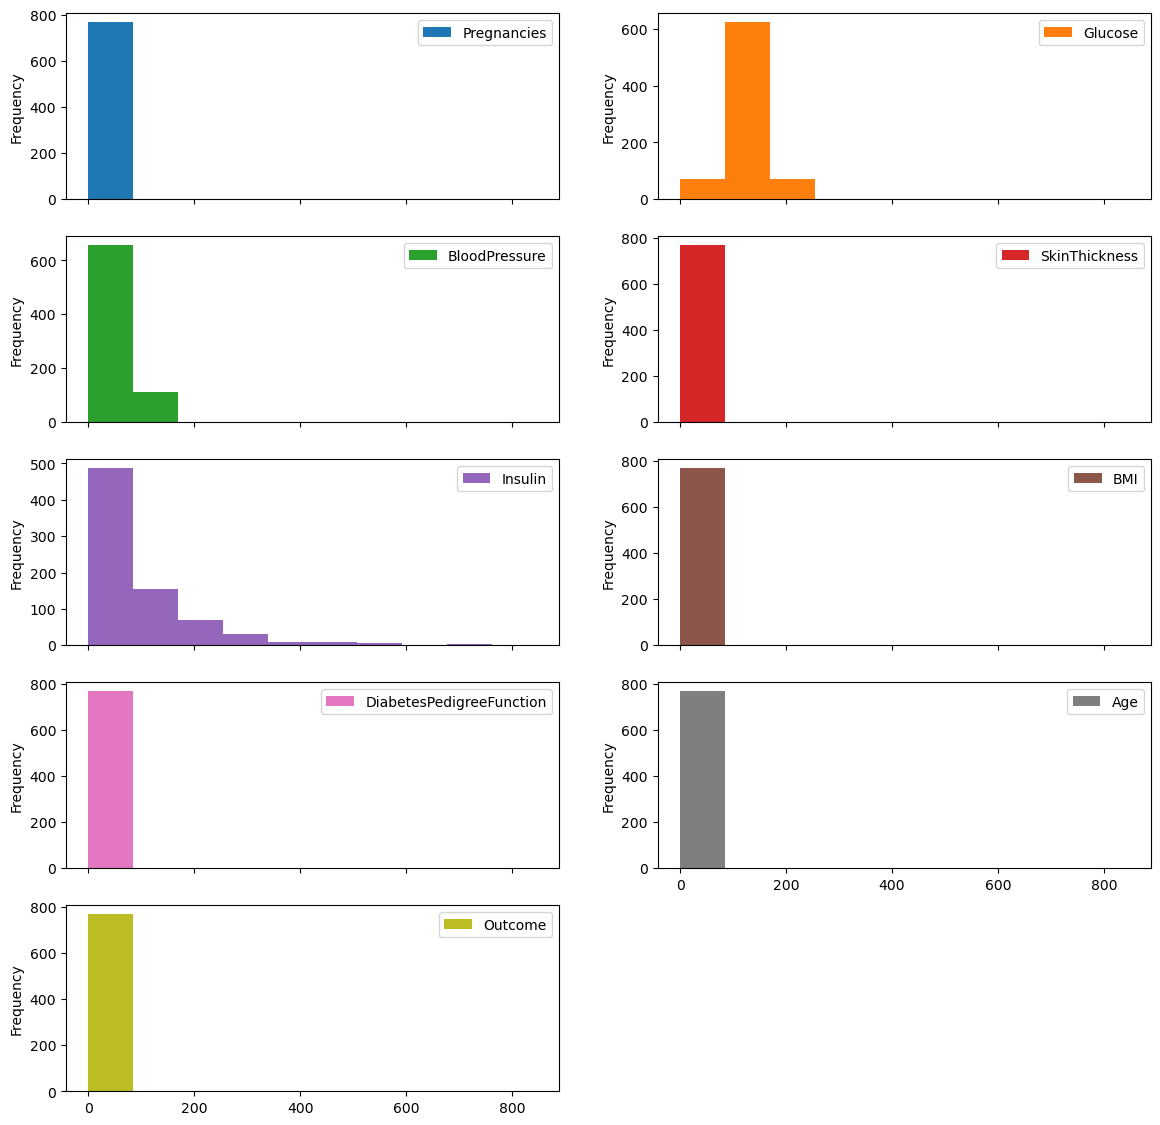

In [75]:
num_df.plot(kind='hist', subplots=True, layout=(5, 2), figsize=(14, 14))

Pregnancies                    Axes(0.125,0.747241;0.352273x0.132759)
Glucose                     Axes(0.547727,0.747241;0.352273x0.132759)
BloodPressure                  Axes(0.125,0.587931;0.352273x0.132759)
SkinThickness               Axes(0.547727,0.587931;0.352273x0.132759)
Insulin                        Axes(0.125,0.428621;0.352273x0.132759)
BMI                         Axes(0.547727,0.428621;0.352273x0.132759)
DiabetesPedigreeFunction        Axes(0.125,0.26931;0.352273x0.132759)
Age                          Axes(0.547727,0.26931;0.352273x0.132759)
Outcome                            Axes(0.125,0.11;0.352273x0.132759)
dtype: object

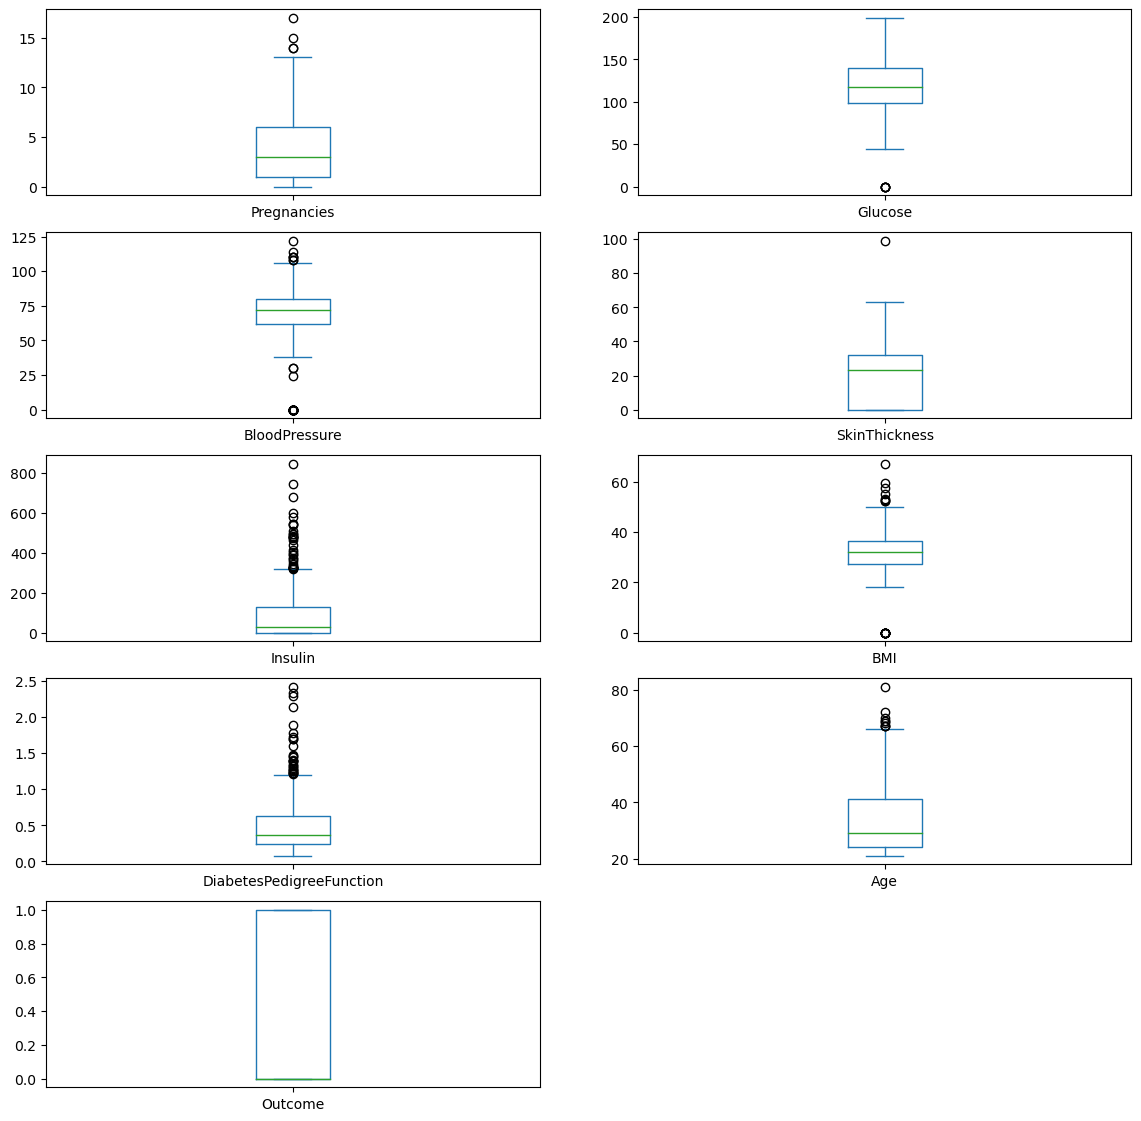

In [76]:
num_df.plot(kind='box', subplots=True, layout=(5, 2), figsize=(14, 14))

In [77]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

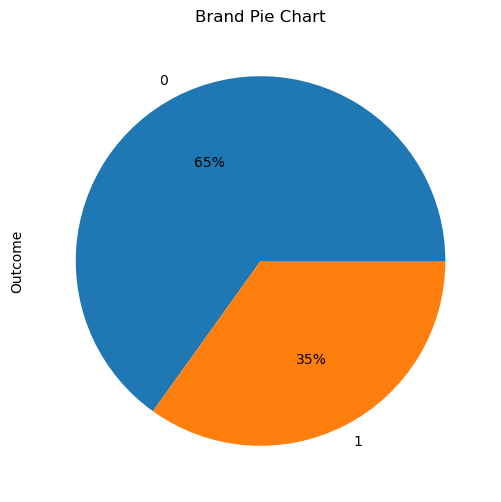

In [78]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.0f%%', title="Brand Pie Chart", figsize=(12,6))
plt.show()

### Split into dependent and independent

In [79]:
X = df.drop("Outcome", axis = 1)

In [80]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.00,72.00,35.00,0.00,33.60,0.63,50
1,1,85.00,66.00,29.00,0.00,26.60,0.35,31
2,8,183.00,64.00,0.00,0.00,23.30,0.67,32
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33
...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63
764,2,122.00,70.00,27.00,0.00,36.80,0.34,27
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30
766,1,126.00,60.00,0.00,0.00,30.10,0.35,47


In [81]:
y = df["Outcome"]

In [82]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Test Train Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [85]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162.00,76.00,56.00,100.00,53.20,0.76,25
172,2,87.00,0.00,23.00,0.00,28.90,0.77,25
307,0,137.00,68.00,14.00,148.00,24.80,0.14,21
7,10,115.00,0.00,0.00,0.00,35.30,0.13,29
448,0,104.00,64.00,37.00,64.00,33.60,0.51,22
...,...,...,...,...,...,...,...,...
369,1,133.00,102.00,28.00,140.00,32.80,0.23,45
320,4,129.00,60.00,12.00,231.00,27.50,0.53,31
527,3,116.00,74.00,15.00,105.00,26.30,0.11,24
125,1,88.00,30.00,42.00,99.00,55.00,0.50,26


In [86]:
y_train

120    1
172    0
307    0
7      0
448    1
      ..
369    1
320    0
527    0
125    1
265    0
Name: Outcome, Length: 614, dtype: int64

### Data Preprocessing on Training Data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
sc =StandardScaler()

In [89]:
X_train_scaled = sc.fit_transform(X_train)

In [90]:
X_train_scaled

array([[-1.1328442 ,  1.24373812,  0.3472366 , ...,  2.72776337,
         0.90749721, -0.69845742],
       [-0.54212969, -1.05209466, -3.48608463, ..., -0.36979162,
         0.95037384, -0.69845742],
       [-1.1328442 ,  0.47846052, -0.0562709 , ..., -0.89242436,
        -0.97907465, -1.03881683],
       ...,
       [-0.24677243, -0.16437265,  0.24635973, ..., -0.70121726,
        -1.08932885, -0.78354727],
       [-0.83748694, -1.02148356, -1.97293151, ...,  2.95721189,
         0.10202903, -0.61336757],
       [ 0.34394208, -0.77659473,  0.24635973, ...,  0.22932395,
         1.63639998,  0.83315992]])

### Preparing Test Data

In [91]:
X_test_scaled = sc.transform(X_test)

In [92]:
X_test_scaled 

array([[ 0.04858483,  0.99884929,  0.14548285, ..., -0.06386026,
        -0.3818644 ,  0.32262081],
       [-0.54212969, -0.28681707,  0.85162098, ...,  0.84118667,
        -0.66362514, -0.44318786],
       [-0.83748694,  0.41723832, -0.76240902, ..., -0.6502287 ,
         0.68698881,  2.44986711],
       ...,
       [ 1.23001385, -1.11331687, -0.71197058, ..., -0.94341292,
        -1.00051297,  0.74807007],
       [ 0.34394208,  0.2641828 ,  0.64986723, ...,  0.93041665,
         1.51083269,  0.32262081],
       [-0.24677243, -0.68476142, -0.76240902, ..., -0.79044724,
        -0.94538587, -0.78354727]])

### KNeighborsClassifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 66.23376623376623 %
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76        95
           1       0.60      0.36      0.45        59

    accuracy                           0.66       154
   macro avg       0.64      0.60      0.60       154
weighted avg       0.65      0.66      0.64       154

Confusion Matrix:
 [[81 14]
 [38 21]]


### LogisticRegression

In [95]:
from sklearn.linear_model import LogisticRegression
lor_model = LogisticRegression()
lor_model.fit(X_train_scaled,y_train)
y_pred = lor_model.predict(X_test_scaled)

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 76.62337662337663 %
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154

Confusion Matrix:
 [[88  7]
 [29 30]]


### DecisionTreeClassifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 69.48051948051948 %
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80        95
           1       0.83      0.25      0.39        59

    accuracy                           0.69       154
   macro avg       0.75      0.61      0.59       154
weighted avg       0.74      0.69      0.64       154

Confusion Matrix:
 [[92  3]
 [44 15]]


### RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 101)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 74.67532467532467 %
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        95
           1       0.74      0.53      0.61        59

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

Confusion Matrix:
 [[84 11]
 [28 31]]


### Linear SVM

In [101]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_scaled,y_train)
y_pred = svm_model.predict(X_test_scaled)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 76.62337662337663 %
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154

Confusion Matrix:
 [[88  7]
 [29 30]]


### AdaBoost Classifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
lor_model = LogisticRegression()
ada_model = AdaBoostClassifier(base_estimator = lor_model, n_estimators = 10)
ada_model.fit(X_train_scaled,y_train)
y_pred = ada_model.predict(X_test_scaled)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 74.67532467532467 %
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82        95
           1       0.79      0.46      0.58        59

    accuracy                           0.75       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.75      0.73       154

Confusion Matrix:
 [[88  7]
 [32 27]]


### Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(learning_rate = 0.6,n_estimators = 10)
gbm_model.fit(X_train_scaled, y_train)
y_pred = gbm_model.predict(X_test_scaled)


In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")
print("Classification report:\n", classification_report(y_test,y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 75.32467532467533 %
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        95
           1       0.71      0.59      0.65        59

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[81 14]
 [24 35]]


In [107]:
new_df = pd.DataFrame({
    'Model Name': ['K Neighbors Classifier','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Linear SVM','AdaBoost Classifier','Gradient Boosting Classifier'],
    'Accuracy Score':  [66.23, 76.62, 69.48, 74.67, 76.62, 74.67, 75.32]
})
new_df

,Model Name,Accuracy Score
0,K Neighbors Classifier,66.23
1,Logistic Regression,76.62
2,Decision Tree Classifier,69.48
3,Random Forest Classifier,74.67
4,Linear SVM,76.62
5,AdaBoost Classifier,74.67
6,Gradient Boosting Classifier,75.32


### Saving the Model (Serialization)

In [108]:
from pickle import dump

dump(sc, open('model/standard_scaler.pkl', 'wb'))
dump(knn_model, open('model/knn_model.pkl', 'wb'))
dump(lor_model, open('model/lr_model.pkl', 'wb'))
dump(dt_model, open('model/dt_model.pkl', 'wb'))
dump(rf_model, open('model/rf_model.pkl', 'wb'))
dump(svm_model, open('model/svm_model.pkl', 'wb'))
dump(ada_model, open('model/ada_model.pkl', 'wb'))
dump(gbm_model, open('model/gbm_model.pkl', 'wb'))

In [109]:
import numpy as np
from pickle import load

### Productionisation (Model Deserialization)

In [110]:
sc = load(open('model/standard_scaler.pkl', 'rb'))
knn_model = load(open('model/knn_model.pkl', 'rb'))
lor_model = load(open('model/lr_model.pkl', 'rb'))
dt_model = load(open('model/dt_model.pkl', 'rb'))
rf_model = load(open('model/rf_model.pkl', 'rb'))
svm_model = load(open('model/svm_model.pkl', 'rb'))
ada_model = load(open('model/ada_model.pkl', 'rb'))
gbm_model = load(open('model/gbm_model.pkl', 'rb'))

### Read the Query Data


In [111]:
print("Enter the diabetes Details")
Pregnancies = float(input('Enter Pregnancies : '))
Glucose = float(input('Enter Glucose : '))
BloodPressure = float(input('Enter Blood Pressure level : '))
SkinThickness = float(input('Enter Skin Thickness : '))
Insulin = float(input('Enter Insulin : '))
BMI= float(input('Enter BMI : '))
DiabetesPedigreeFunction = float(input('Enter DiabetesPedigreeFunction : '))
Age = float(input('Enter Age : '))

Enter the diabetes Details
Enter Pregnancies : 2
Enter Glucose : 138
Enter Blood Pressure level : 62
Enter Skin Thickness : 35
Enter Insulin : 0
Enter BMI : 33.6
Enter DiabetesPedigreeFunction : 127
Enter Age : 47


### Converting the values to 2D Array

In [112]:
query_point = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age])

In [113]:
query_point

array([  2. , 138. ,  62. ,  35. ,   0. ,  33.6, 127. ,  47. ])

In [114]:
query_point = query_point.reshape(1, -1)

In [115]:
query_point

array([[  2. , 138. ,  62. ,  35. ,   0. ,  33.6, 127. ,  47. ]])

In [116]:
query_point_transformed = sc.transform(query_point)
query_point_transformed

array([[-5.42129688e-01,  5.09071628e-01, -3.58901519e-01,
         9.02328413e-01, -6.80680418e-01,  2.29323953e-01,
         3.87535287e+02,  1.17351933e+00]])

### Linear SVM has high accuracy rate, so we select this model to predict whether person has diabetes or not

In [118]:
svm_model.predict(query_point_transformed)

array([1], dtype=int64)

### Production Ready Code

In [ ]:
print("Enter the diabetes Details")
Pregnancies = float(input('Enter Pregnancies : '))
Glucose = float(input('Enter Glucose : '))
BloodPressure = float(input('Enter Blood Pressure level : '))
SkinThickness = float(input('Enter Skin Thickness : '))
Insulin = float(input('Enter Insulin : '))
BMI= float(input('Enter BMI : '))
DiabetesPedigreeFunction = float(input('Enter DiabetesPedigreeFunction : '))
Age = float(input('Enter Age : '))
query_point = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]).reshape(1, -1)
query_point_transformed = sc.transform(query_point)
svm_model.predict(query_point_transformed)